# ニューラルネットワーク

## 最もシンプルなステップ関数

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

### NumPyの配列を引数にとる

In [3]:
def step_function(x):
    y = x > 0 #[True, False, True, ...]のような形になる
    return y.astype(np.int) #True, Falseを1, 0に変換

In [4]:
import numpy as np

In [14]:
x = np.array([-1., 1., 2.])
x

array([-1.,  1.,  2.])

In [13]:
y = x > 0
y

array([False,  True,  True])

In [16]:
y = y.astype(np.int)
y

array([0, 1, 1])

### step関数のグラフ

In [17]:
import matplotlib.pyplot as plt

In [18]:
def step_function(x):
    return np.array(x>0, dtype=np.int)

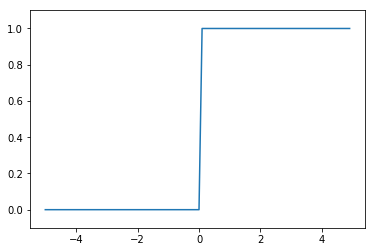

In [24]:
x = np.arange(-5.0, 5.0, 0.1)#[-5,5)まで0.1の間隔のリストを作成
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #yの範囲指定
plt.show()

## sigmoid関数の実装

In [159]:
def sigmoid(x):
    return 1/(1+np.exp(-x))#xがNumPy配列の時ブロードキャストでリストが返る

In [28]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### sigmoid関数のグラフ

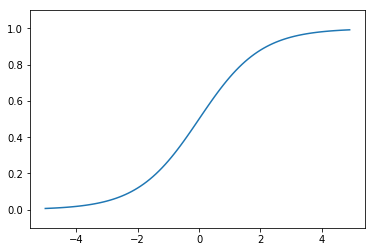

In [29]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## ReLU(Rectified Linear Unit)

In [42]:
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.maximum(0.1*x, x) #グラフでわかりやすいようにa=0.1として設定

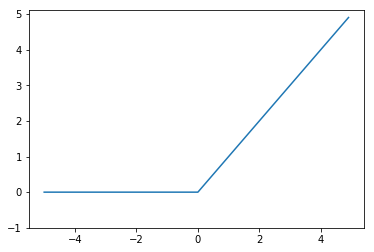

In [43]:
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5.1)
plt.show()

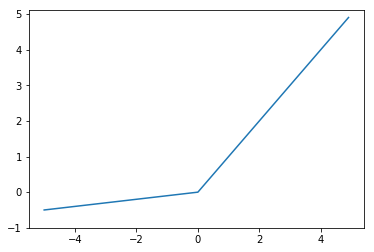

In [44]:
y = leaky_relu(x)
plt.plot(x, y)
plt.ylim(-1, 5.1)
plt.show()

## 多次元配列

In [46]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [47]:
np.ndim(A)

1

In [50]:
A.shape #常にタプルで値を返すため、一次元でもタプルで返ってくる

(4,)

In [49]:
A.shape[0]

4

In [51]:
B = np.array([[1, 2], [3, 4], [5, 6]])

In [52]:
np.ndim(B)

2

In [53]:
B.shape

(3, 2)

### 行列の積

In [56]:
A = np.array([[1,2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [59]:
C = np.array([[1, 2], [3, 4], [5, 6]])
np.dot(A, C)#要素数が不一致だとエラー

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

## ニューラルネットワークの行列の積

In [61]:
X = np.array([1, 2]) #x1, x2
X.shape

(2,)

In [65]:
W = np.array([[1, 3, 5], [2, 4, 6]]) #[w1, w1, w1], [w2, w2, w2]
W.shape

(2, 3)

In [66]:
b = 1
Y = np.dot(X, W) + b # ブロードキャスト
print(Y)

[ 6 12 18]


## 3層ニューラルネットワークの実装

In [71]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

In [72]:
A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


In [75]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [76]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [78]:
A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [82]:
#出力層の活性化関数として利用する恒等関数。出力層の活性化関数はσ()で表す
def identity_function(x):
    return x

In [83]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

# これまでの実装をまとめて書く

In [85]:
def init_network():
    network={}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [86]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [87]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## softmax関数の実装

In [88]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

In [89]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [90]:
#softmaxがオーバーフローするので改善が必要
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))#オーバーフロー

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([nan, nan, nan])

In [93]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [94]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## 改善案のsoftmaxの実装

In [158]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [96]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

# 手書き数字認識

In [154]:
import sys, os
sys.path.append(os.pardir)#親ディレクトリのファイルをインポート
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [155]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import pickle

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


## ニューラルネットワークの推論処理

In [164]:
#　改善したソフトマックス
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [165]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)#最も高い要素のインデックスを返す
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## バッチ処理

In [166]:
x, t = get_data()
network = init_network()

batch_size = 128
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)# 一次元目の要素ごとに最大値のインデックスを見る
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
